# Least Squares, Residuals and RMSE
The Least Squares method is applied to a set of measurements (tracking data) to find the states values that minimize a specific cost function. In this example we'll see how to apply it for a simple, undimensional case. 
Image we have a radar placed at the origin of a reference system; a train travels along the +$X$ direction with a constant speed, and the radar produces a set of range measurements equally spaced in time. The instantaneous position of the train is $S$

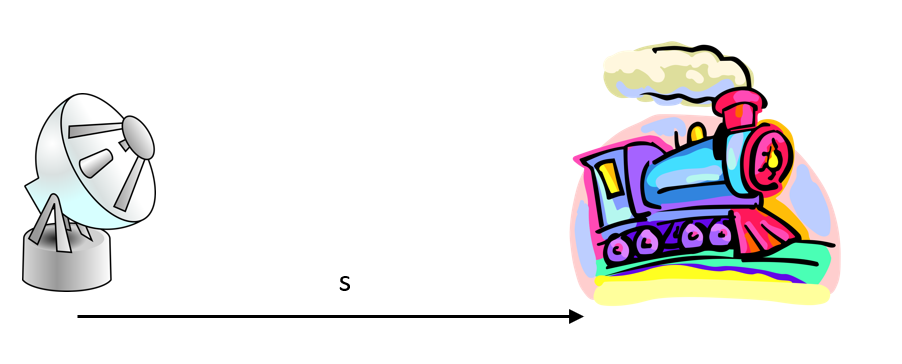

### Equation of Motion
The equation that describe the motion of the train is 
## $$ S\left ( t \right )=S_{0}+V*t $$
, where $S_{0}$ is the intial distance of train respect to the radar site and $V$ is the velocity of the train

In [1]:
# define the intitial conditions for the motion equation
s0 = 0; #m
v = 3; #m/sec

We can calculate the position of the train over a specific time interval:

In [2]:
import numpy as np
import pandas as pd

# create the independent variable array
initTime = 0;
finalTime = 15;
nMeasures = 16;
t = np.linspace(initTime, finalTime, nMeasures)

# apply the equation of motion
s = s0 + v * t;

# show data
dataTable = {'Time (sec)': t, 'Position (m)': s};
df = pd.DataFrame(data = dataTable)
df.head(6)

,Time (sec),Position (m)
0,0.0,0.0
1,1.0,3.0
2,2.0,6.0
3,3.0,9.0
4,4.0,12.0
5,5.0,15.0


### Radar Modeling and Measurements Generation
We now model the radar in terms of its statistical properties:

$\bullet$ $\sigma$ defines how sparse the measurements are respect to the true value;

$\bullet$ *offset* represents the sistematic error (the difference between the mean and the true value) of the device'

A set of measurements are simulated accordigly with the normal distribution hypotesis. We also calculate the correspondent **residuals**, i.e. the difference between measured values and true position:

### $$\Delta y = y_{obs}-y_{calc}$$

In [3]:
from scipy.stats import norm

# statistical model of the radar  # optionally, the offset can be set as linear function of the distance
oneSigma = 1; # m                 #oneSigma = 0.1*s; # m
offset = 0;     # m                 #offset = 0;         # m

# simulate measurements
meas = s + oneSigma * np.random.randn(nMeasures) + offset;
residuals = meas - s;

... and we plot the resulting data:

,Time (sec),True Position (m),Measured Value (m),Residuals (m)
0,0.0,0.0,-0.187643,-0.187643
1,1.0,3.0,5.104112,2.104112
2,2.0,6.0,4.974101,-1.025899
3,3.0,9.0,6.926218,-2.073782
4,4.0,12.0,11.425809,-0.574191
5,5.0,15.0,13.703384,-1.296616


None

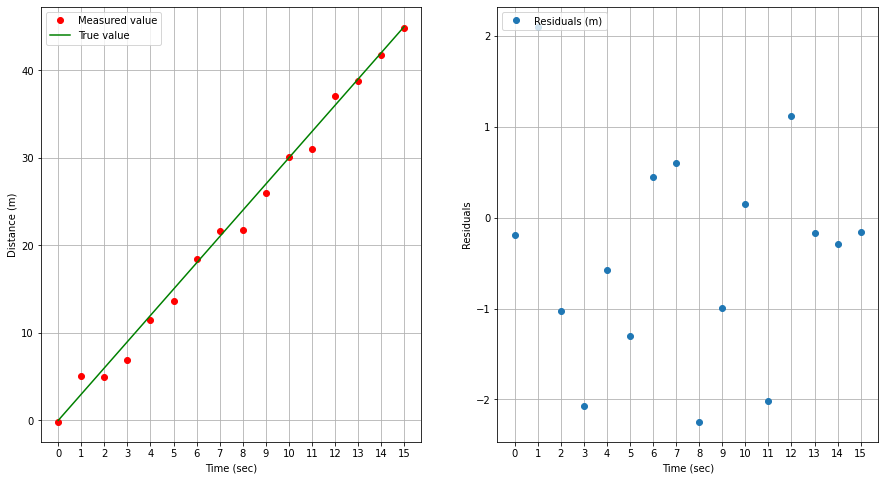

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# show data
dataTable = {'Time (sec)': t, 'True Position (m)': s, 'Measured Value (m)': meas, 'Residuals (m)': residuals};
df = pd.DataFrame(data = dataTable)
display(df.head(6))

fig, axs = plt.subplots(1,2)
axs[0].plot(t, meas, 'ro', label='Measured value')
axs[0].plot(t, s, color='green', label='True value')
axs[0].set_xlabel('Time (sec)')
axs[0].set_ylabel('Distance (m)')
axs[0].set_xticks(t)
axs[0].grid(True)
axs[0].legend(loc='upper left')
axs[1].plot(t, residuals, 'o', label='Residuals (m)')
axs[1].set_xlabel('Time (sec)')
axs[1].set_ylabel('Residuals')
axs[1].set_xticks(t)
axs[1].grid(True)
axs[1].legend(loc='upper left')
display(fig.set_size_inches(15,8))

### Least Squares
To find the value of the unknown states (defined as $S_{0}$ and $V$ at the beginning of this page) we 'll use the normal equation approach. The normal equation is:

## $$ \Theta = \left ( X^{T}X \right )^{^{-1}}X^{^{T}}Y $$

, where $ \Theta$ is the state vector. Let's find this vector applying the formula:

In [5]:
# Define the X matrix
X=np.array([np.ones(len(t)),t.flatten()]).T

# define the Y vector
Y = meas.T

# Using Normal Equation.
theta_best_values=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
 
bestTheta0 = theta_best_values[0]
bestTheta1 = theta_best_values[1]
print('Best Theta0 = ' + str(bestTheta0)) 
print('Best Theta1 = ' + str(bestTheta1)) 

Best Theta0 = -0.3857385467746628
Best Theta1 = 2.996463897570144


### Root Mean Square Error (RMSE)
Now we've found the state vector ($ \theta_{_{0}} $ and $ \theta_{_{1}} $) that best fits our measurements. Those values define a straight line that we call *linear regression* and represents out best analytical model to predict traveled distances for any given time. Since our measurements are perturbed, we expect some difference between the and the corresponding true values.
The RMSE measures how much error there is between the prediction model and the measurements . In other words, it compares a predicted value and an observed or known value. The smaller an RMSE value, the closer predicted and observed values are. It is defined as:

## $$ RMSE=\sqrt{\frac{\sum_{i=n}^{b}(meas_{i}-p_{i})^{2}}{n}} $$

'RMSE = 1.1506294009605542'

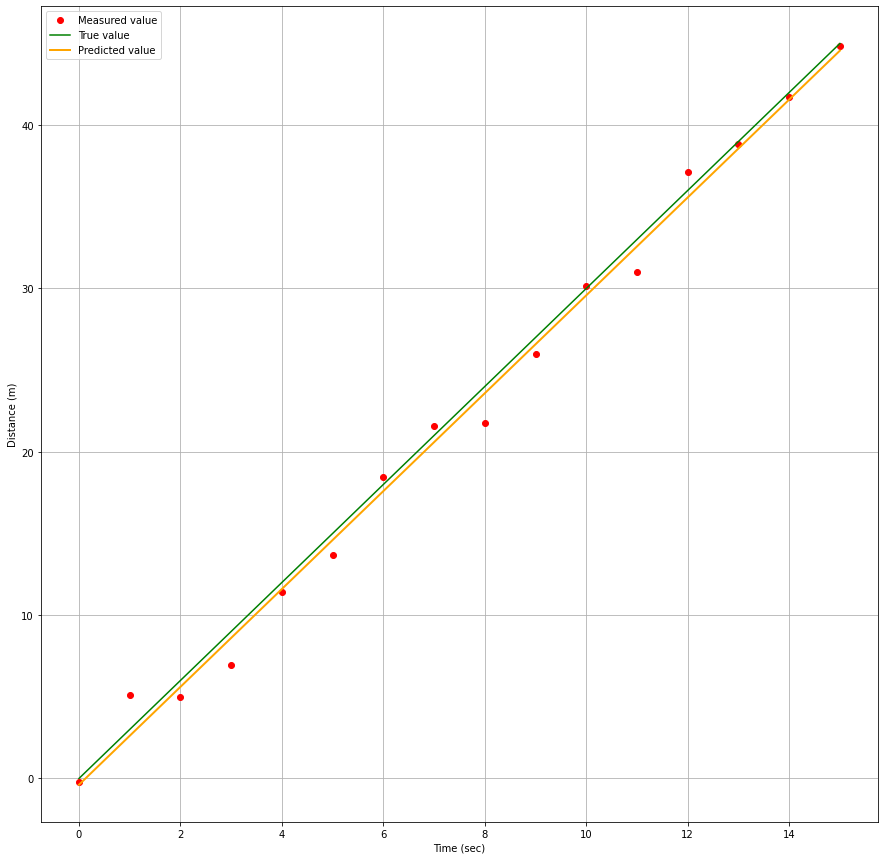

In [7]:
#define the equation for the predicted values
p = bestTheta0 + bestTheta1 * t;

rmse = np.sqrt(np.mean((meas - p)**2))
display('RMSE = ' + str(rmse))

# plot the data
f = plt.figure(figsize=(16,5))
ax1 = f.add_subplot(111)
ax1.grid(True)
plt.xlabel("Time (sec)")
plt.ylabel("Distance (m)")

plot = ax1.plot(t, meas, 'ro', label='Measured value')
plot = plt.plot(t, s, 'green', label='True value')

plot = plt.plot(t, p, 'orange', linewidth=2, label='Predicted value')
legend = plt.legend()
f.set_size_inches(15,15)